In [2]:
from pathlib import Path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install mediapipe
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks
path = ("/content/drive/MyDrive/run_walk_images/walk_or_run_train/train/run") # enter dataset path
data = []
for p in points:
        x = str(p)[13:]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
data = pd.DataFrame(columns = data) # Empty datase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 31.8 MB/s eta 0:00:00


In [5]:
from google.colab.patches import cv2_imshow

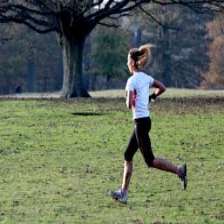

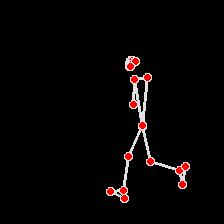

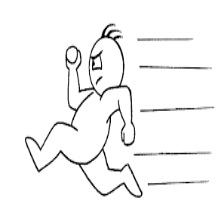

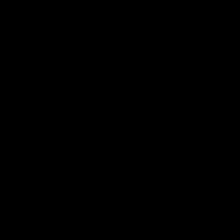

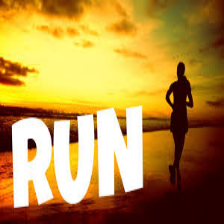

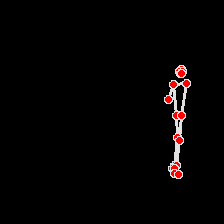

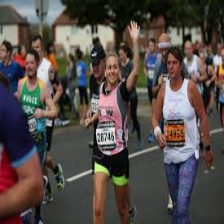

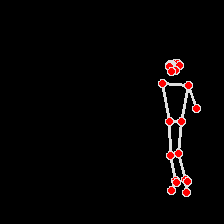

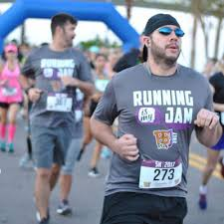

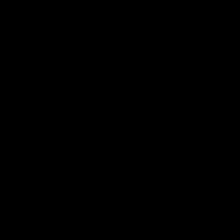

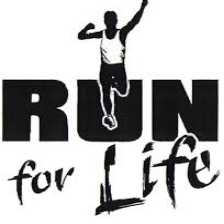

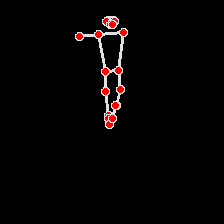

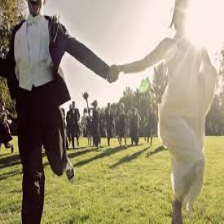

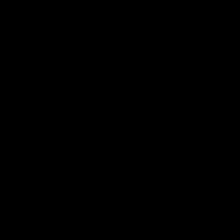

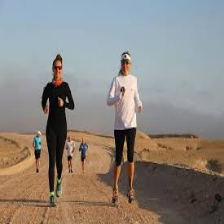

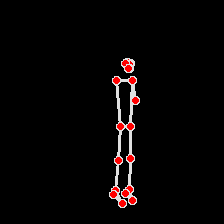

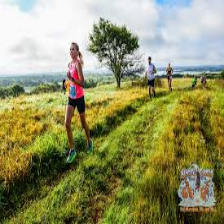

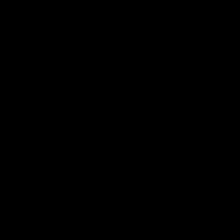

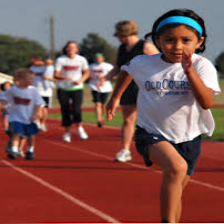

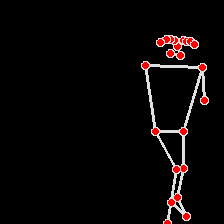

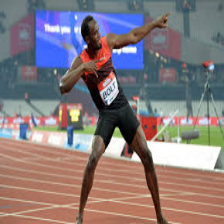

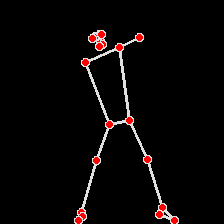

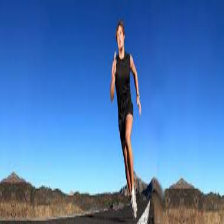

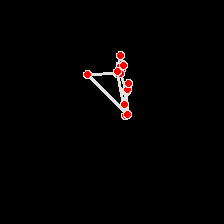

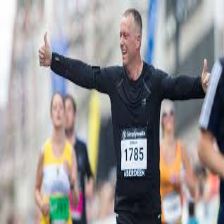

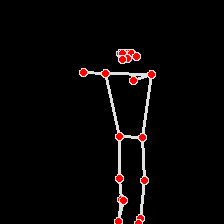

In [6]:
count = 0

for img in os.listdir(path):

        temp = []

        img = cv2.imread(path + "/" + img)

        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]

                data.loc[count] = temp

                count +=1

        if count < 10:
          cv2_imshow(img)

          cv2_imshow(blackie)

        cv2.waitKey(100)

data.to_csv("dataset3.csv") # save the data as a csv file

In [8]:
data

,Unnamed: 0,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0,0.576444,0.282916,0.068626,0.999753,0.582092,0.271742,0.028981,0.999745,0.582549,...,0.259772,0.948767,0.815652,0.825890,-0.032296,0.984306,0.491570,0.856719,0.225595,0.974601
1,1,0.806931,0.321311,0.206230,0.999535,0.806478,0.313061,0.182176,0.999590,0.805329,...,-0.044513,0.927271,0.777084,0.776600,-0.026854,0.914736,0.797429,0.776907,-0.092740,0.918894
2,2,0.772538,0.300828,-0.550756,0.999580,0.780541,0.286282,-0.531775,0.999628,0.785546,...,0.356222,0.871050,0.831112,0.859351,-0.019356,0.885612,0.765991,0.850292,0.237672,0.875299
3,3,0.495739,0.100228,0.100960,0.999604,0.490875,0.092021,0.068936,0.999649,0.487160,...,0.245136,0.881055,0.487538,0.556957,0.131373,0.887237,0.503962,0.530925,0.262326,0.880581
4,4,0.579730,0.295216,-0.184367,0.999599,0.579431,0.283648,-0.158907,0.999644,0.580469,...,0.124271,0.861310,0.593623,0.895946,0.089179,0.888231,0.546848,0.906574,-0.061430,0.884239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,0.550161,0.136117,-0.429595,0.991781,0.559390,0.118377,-0.413197,0.991809,0.564809,...,0.279561,0.787009,0.694518,0.719427,0.072850,0.790913,0.550883,0.809397,0.059041,0.800040
198,198,0.546802,0.192804,-0.135791,0.992602,0.555626,0.175045,-0.160293,0.992628,0.559383,...,0.025674,0.808186,0.495551,0.937606,-0.349957,0.811265,0.886081,0.865263,-0.043197,0.819827
199,199,0.489520,0.408919,-0.270890,0.993337,0.492860,0.400373,-0.237033,0.993359,0.495192,...,0.065467,0.798203,0.525869,0.922954,0.130290,0.807833,0.473175,0.944324,-0.098175,0.825397
200,200,0.711990,0.437875,0.038978,0.993415,0.711238,0.430790,0.024002,0.993416,0.710441,...,-0.048350,0.797074,0.758048,0.844394,-0.099965,0.790620,0.758138,0.842907,-0.109413,0.806293


In [9]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Path for all files
train_data_dir = '/content/drive/MyDrive/run_walk_images/walk_or_run_train/'
test_data_dir = '/content/drive/MyDrive/run_walk_images/walk_or_run_test/'

In [11]:
# Global Variables -- Constants
RESCALE = 1/255
TARGET_SIZE = (300, 300)
COLOR_MODE = "rgb"
CLASS_MODE = "categorical"
BATCH_SIZE = 32

In [12]:
# Using ImageDataGenerator to load the Images for Training and Testing the CNN Model
datagenerator = {
    "training_data": ImageDataGenerator(
        horizontal_flip = True,
        vertical_flip = True,
        rescale = RESCALE,
        validation_split = 0.1,
        shear_range = 0.1,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        rotation_range = 30
    ).flow_from_directory(
        directory = os.path.join(train_data_dir, "train"),
        target_size = TARGET_SIZE,
        color_mode = COLOR_MODE,
        class_mode = CLASS_MODE,
        batch_size = BATCH_SIZE,
        subset = 'training'
    ),

    "validation_data": ImageDataGenerator(
        rescale = RESCALE,
        validation_split = 0.1,
    ).flow_from_directory(
        directory = os.path.join(train_data_dir, "train"),
        target_size = TARGET_SIZE,
        color_mode = COLOR_MODE,
        class_mode = CLASS_MODE,
        batch_size = BATCH_SIZE,
        subset = 'validation'
    ),

    "testing_data": ImageDataGenerator(
        rescale = RESCALE,
    ).flow_from_directory(
        directory = os.path.join(test_data_dir, "test"),
        target_size = TARGET_SIZE,
        color_mode = COLOR_MODE,
        class_mode = CLASS_MODE,
        batch_size = BATCH_SIZE,
    ),
}

Found 541 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


In [13]:
# Initializing InceptionV3 (pretrained) model with input image shape as (300, 300, 3)
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))

# Load Weights for the InceptionV3 Model
base_model.load_weights("/content/drive/MyDrive/run_walk_images/v3_model.h5")

# Setting the Training of all layers of InceptionV3 model to false
base_model.trainable = False

In [14]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax') # 2 Output Neurons for 6 Classes
])

In [15]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [16]:
# Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 23903010 (91.18 MB)
Trainable params: 2100226 (8.01 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

In [17]:
# Setting variables for the model
epochs = 20

# Seperating Training and Testing Data
train_generator = datagenerator["training_data"]
valid_generator = datagenerator["validation_data"]
test_generator = datagenerator["testing_data"]

In [18]:

# Calculating variables for the model
steps_per_epoch = train_generator.n // BATCH_SIZE
validation_steps = valid_generator.n // BATCH_SIZE

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 16
validation_steps : 1


In [19]:
# File Path to store the trained models
filepath = os.path.join("./CNN-Models", "model_{epoch:02d}-{val_accuracy:.2f}.h5")

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]

In [ ]:
# Training the Model
history = model.fit_generator(
    generator = train_generator,
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = validation_steps,
    callbacks = callbacks_list
)

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.5560
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to ./CNN-Models/model_01-0.75.h5
16/16 [==============================] - 187s 11s/step - loss: 0.7377 - accuracy: 0.5560 - val_loss: 0.5806 - val_accuracy: 0.7500
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.7053 
Epoch 2: val_accuracy improved from 0.75000 to 0.78125, saving model to ./CNN-Models/model_02-0.78.h5
16/16 [==============================] - 170s 11s/step - loss: 0.5783 - accuracy: 0.7053 - val_loss: 0.4431 - val_accuracy: 0.7812
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 0.5205 - accuracy: 0.7367
Epoch 3: val_accuracy did not improve from 0.78125
16/16 [==============================] - 157s 10s/step - loss: 0.5205 - accuracy: 0.7367 - val_loss: 0.4492 - val_accuracy: 0.7812
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 0.52

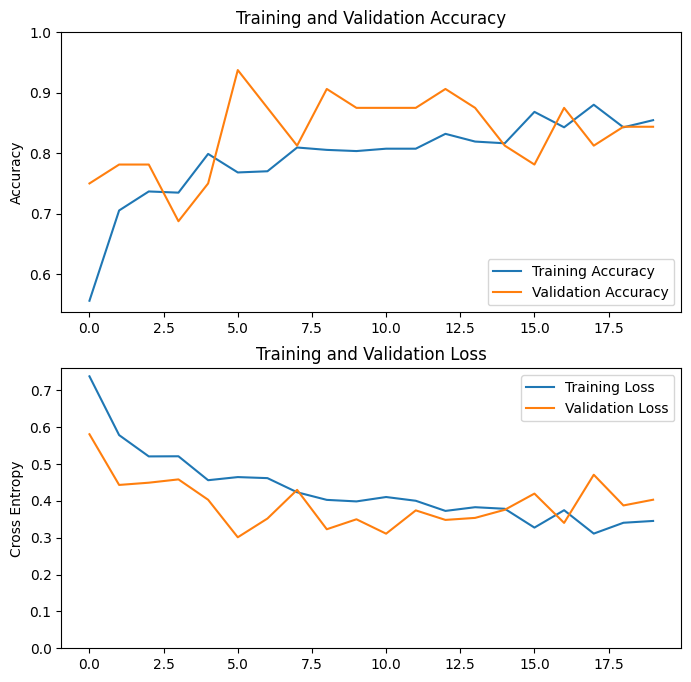

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 ________________

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 ________________

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
val_loss, val_acc = model.evaluate(valid_generator)
print('val accuracy : ', val_acc)

2/2 [==============================] - 15s 8s/step - loss: 0.3686 - accuracy: 0.8475
val accuracy :  0.8474576473236084


In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(test_generator)
print('test accuracy : ', test_acc)

5/5 [==============================] - 47s 9s/step - loss: 0.4134 - accuracy: 0.8014
test accuracy :  0.8014184236526489


In [ ]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("./CNN-Models/model_06-0.94.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(300, 300))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'run', 1: 'walk'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=12)
        plt.ylabel('Probability', fontsize=12)
        plt.xticks(index, classes, fontsize=12, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()

    plot_bar_x()

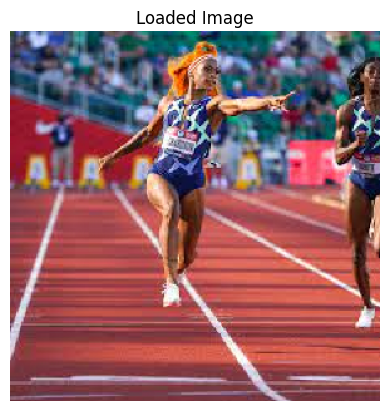

1/1 [==============================] - 0s 445ms/step


Maximum Probability:  0.92647445
Classified: run 



-------------------Individual Probability--------------------------------

RUN : 92.65 %
WALK : 7.35 %


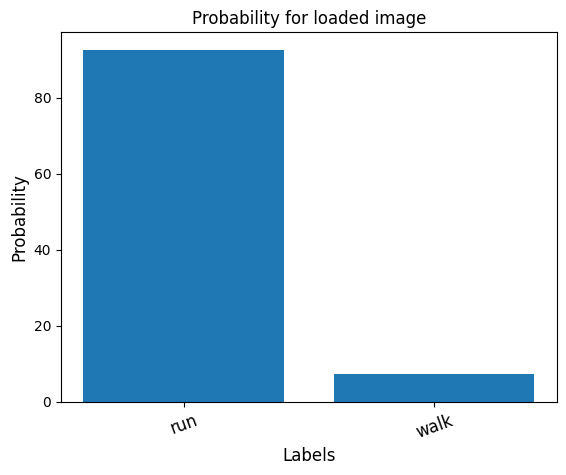

In [ ]:
predict(os.path.join(test_data_dir, "test", "run", "Sha'Carri.png"))
#/content/drive/MyDrive/run_walk_images/walk_or_run_test/test/run/run_0987572f.png

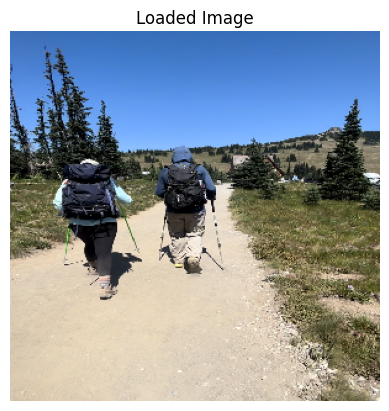

1/1 [==============================] - 0s 470ms/step


Maximum Probability:  0.74307716
Classified: walk 



-------------------Individual Probability--------------------------------

RUN : 25.69 %
WALK : 74.31 %


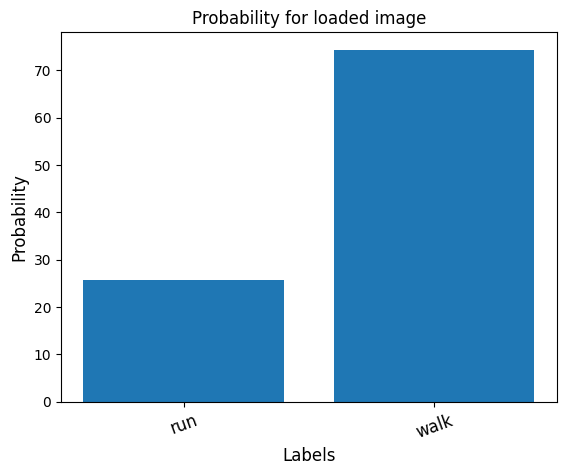

In [ ]:
predict(os.path.join(test_data_dir, "test", "walk", "Hiker4.png"))

NameError: ignored